# Imports

In [1]:
import numpy as np
from Fit import Fit
from funcs import *
from stats import *
import scienceplots
plt.style.use(['grid'])

# Funcs

In [48]:
def G_R(w, R, R_L, L):
    return R/np.sqrt((R+R_L)**2 + (w*L)**2)

def fase_R(w, R, R_L, L):
    return np.arctan(w*L/(R+R_L))

def G_L(w, R, R_L, L):
    return np.sqrt( np.power( R_L*(R+R_L) + np.power(w*L,2) , 2) + np.power(w*R*L, 2) ) / ( np.power(R+R_L,2) + np.power(w*L,2) )

def fase_L(w, R, R_L, L):
    return np.arctan(w*R*L / (R*(R+R_L) + np.power(w*L,2)))

# RL

In [4]:
if 1:
    path_folder = 'data/RL/'
    V_res, V_l, fase_res, fase_l, freqs, V_res_err, V_l_err = [], [], [], [], [], [], []

    for i in sorted([int(i) for i in os.listdir(path_folder)]):

        path = path_folder+str(i)+'/'

        CH1,SGN,MTH, V_SGN, V_MTH, zero_CH1, zero_SGN, zero_MTH, m1, m2, m3, dt_CH1, dt_MTH, V_SGN_err, V_MTH_err = analize(path, i, force=True, prec=1e-8,verbose=True)
        
        # x=np.linspace(np.min(CH1[0]), np.max(CH1[0]), 100)

        # plt.figure(figsize=(10,4))
        # plt.plot(x, sine(x, **m1.values.to_dict()), label='CH1 fit', color='red')
        # plt.plot(x, sine(x, **m2.values.to_dict()), label='SGN fit', color='blue')
        # plt.plot(x, sine(x, **m3.values.to_dict()), label='MTH fit', color='green')
        
        # # plt.plot(CH1[0], CH1[1], label='CH1', color='red')
        # # plt.plot(SGN[0], SGN[1], label='SGN', color='blue')
        # # plt.plot(MTH[0], MTH[1], label='MTH', color='green')

        # plt.scatter(zero_CH1, 0, color='red', label='zero CH1')
        # plt.scatter(zero_SGN, 0, color='blue', label='zero SGN')
        # plt.scatter(zero_MTH, 0, color='green', label='zero MTH')
        # plt.legend(ncol=2)
        # plt.show()
        # print(i, dt_CH1, dt_MTH)

        V_res.append(V_SGN)
        V_l.append(V_MTH)
        V_res_err.append(V_SGN_err)
        V_l_err.append(V_MTH_err)
        fase_res.append(dt_CH1*i*2*np.pi)
        fase_l.append(dt_MTH*i*2*np.pi)
        freqs.append(i)

    V_res = np.array(V_res)
    V_l = np.array(V_l)
    V_res_err = np.array(V_res_err)
    V_l_err = np.array(V_l_err)
    fase_res = np.array(fase_res)
    fase_l = np.array(fase_l)
    freqs = np.array(freqs)

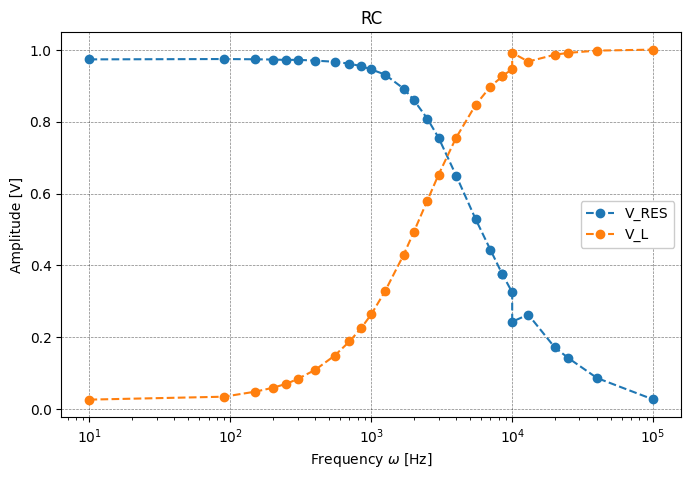

In [5]:
plt.figure(figsize=(8,5))
x = np.linspace(np.min(freqs),np.max(freqs),1000)

# plt.plot(x, H_R(x*2*np.pi, 1e3*12e-9, 0), label='Teorico')
# plt.plot(x, H_C(x*2*np.pi, 1e3*12e-9), label='Teorico')

plt.plot(freqs, V_res, 'o--', label='V_RES')
plt.plot(freqs, V_l, 'o--', label='V_L')
plt.title('RC')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.xscale('log')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


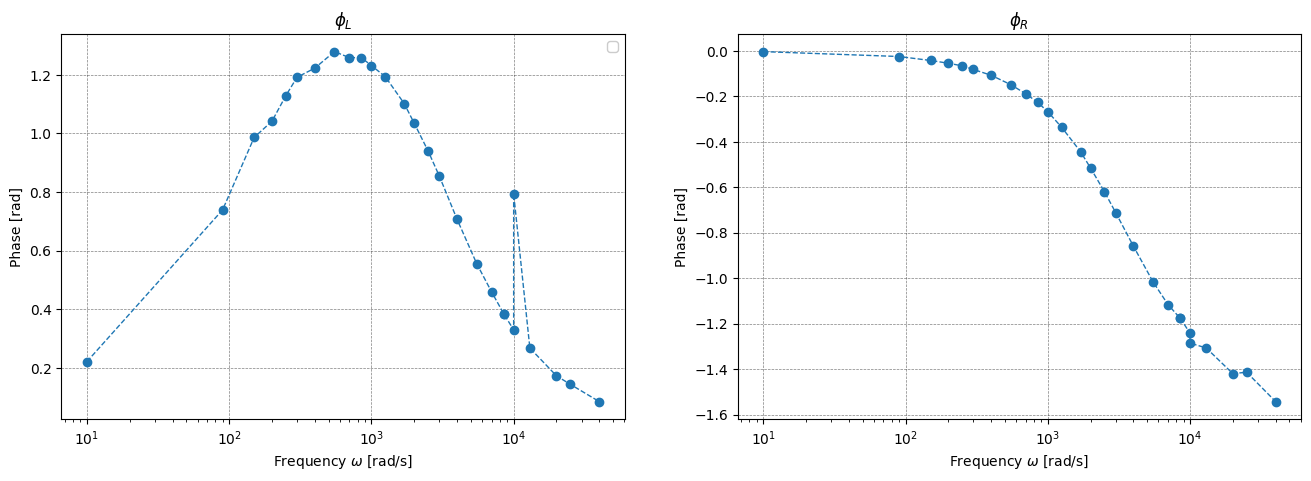

In [6]:
x = np.linspace(np.min(freqs),np.max(freqs),1000)

plt.subplots(1,2,figsize=(16,5))
plt.title('Dati')
plt.subplot(1,2,1)
plt.plot(freqs[:-1], -fase_l[:-1] + np.pi*2,'o--', lw=1)
plt.title('$\phi_L$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.legend()
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(freqs[:-1], -fase_res[:-1], 'o--', lw=1)
# plt.plot(x, fase_C(x*2*np.pi, 1e3, 12e-9, 0), label='Teorico')
# plt.plot(x, fase_R(x*2*np.pi, 1e3, 12e-9), label='Teorico')
plt.title('$\phi_R$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.xscale('log')

# plt.savefig('imgs/RC/fasi_no_log.jpeg', bbox_inches='tight', dpi=200)
plt.show()

# L

2.2422871681708703


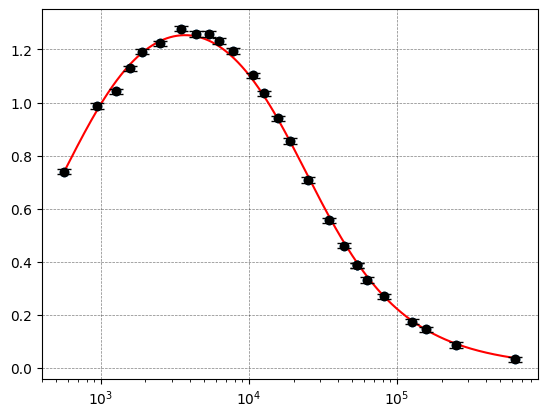

In [25]:
f_f = Fit( (np.delete(freqs, [0, -6])*2*np.pi) , -np.delete(fase_l, [0, -6])+ np.pi*2, fase_L, 0.01, kwargs={'R':1e3, 'R_L':50, 'L':12e-9})
f_f.fit()
f_f.visualize(npoints=30000)
print(f_f.fval/f_f.ndof)
plt.xscale('log')

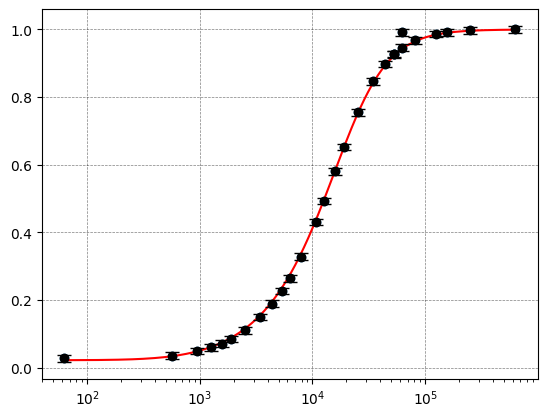

In [26]:
f_m = Fit(freqs*2*np.pi, V_l, G_L, 0.01, kwargs={'R':1e3, 'R_L':50, 'L':0.04})
f_m.fit()
f_m.visualize(npoints=30000)
plt.xscale('log')

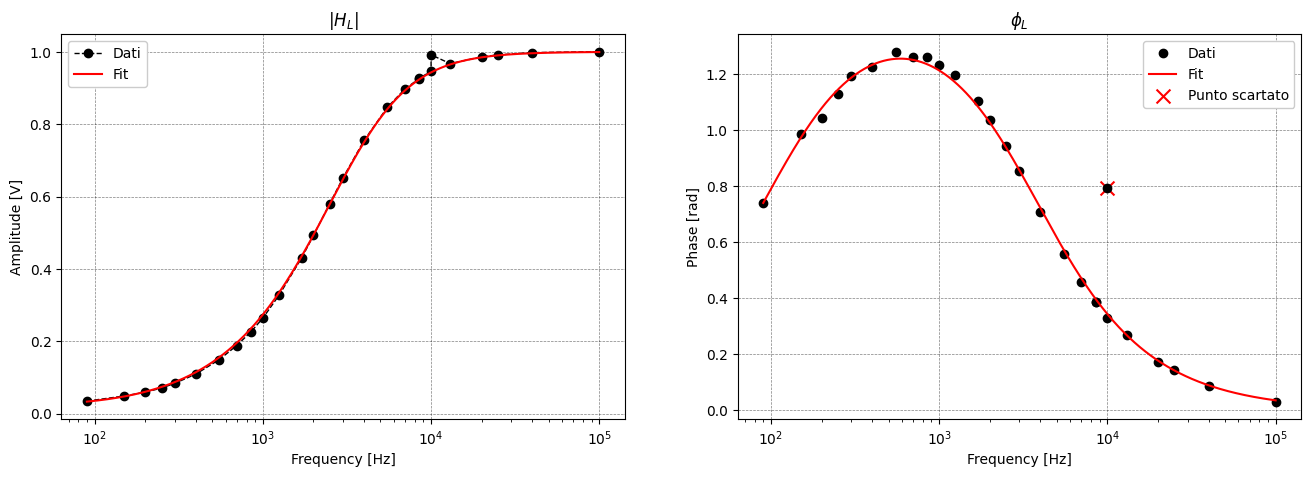

In [47]:
x = np.linspace(np.min(freqs[1:]),np.max(freqs[1:]),1000000)
plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(freqs[1:], V_l[1:], 'o--', lw=1, label='Dati', c='k')
plt.plot(x, G_L(x*2*np.pi, **f_m.values), label='Fit', c='r')
plt.xscale('log')
plt.title("$|H_L|$")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()

plt.subplot(1,2,2)
plt.plot(freqs[1:], -fase_l[1:] + np.pi*2,'o', lw=1, label='Dati', c='k')
plt.plot(x, fase_L(x*2*np.pi, **f_f.values), label='Fit', c='r')
plt.scatter(freqs[-6], -fase_l[-6] + np.pi*2, marker='x', s=100, color='red', label='Punto scartato')
plt.xscale('log')
plt.title('$\phi_L$')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.legend()


# R

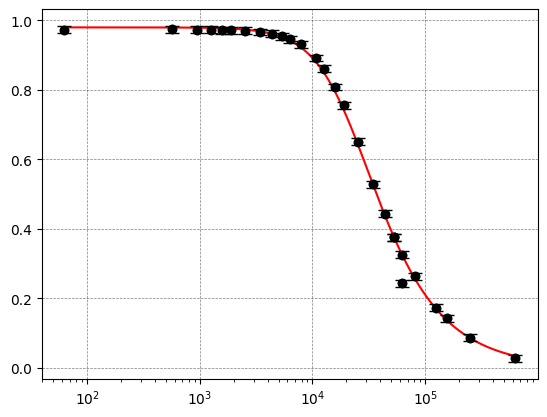

In [50]:
f_m = Fit(freqs*2*np.pi, V_res, G_R, 0.01, kwargs={'R':1e3, 'R_L':50, 'L':0.04})
f_m.fit()
f_m.visualize(npoints=30000)
plt.xscale('log')


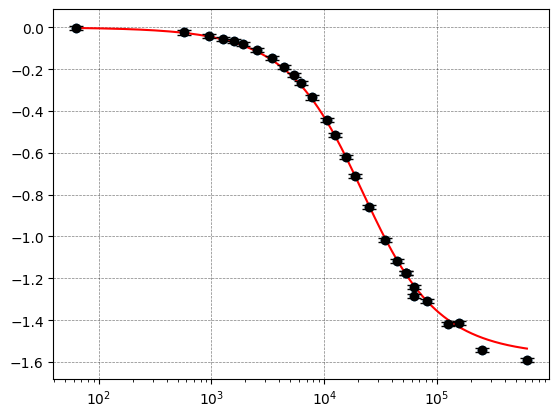

In [52]:
f_f = Fit( (freqs*2*np.pi) , -fase_res, fase_R, 0.01, kwargs={'R':1e3, 'R_L':50, 'L':12e-9})
f_f.fit()
f_f.visualize(npoints=30000)
plt.xscale('log')

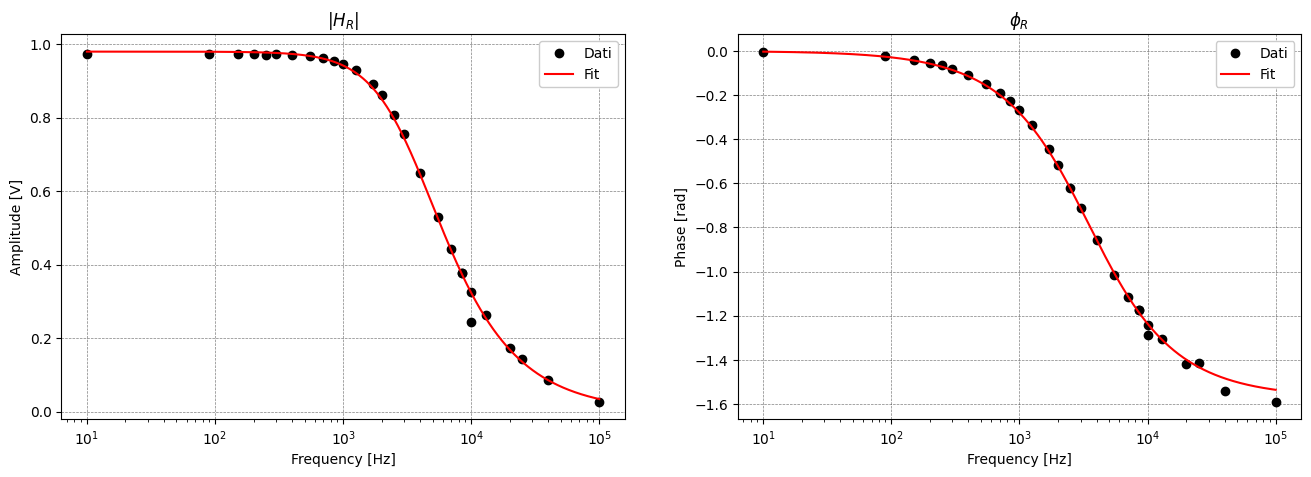

In [56]:
x = np.linspace(np.min(freqs),np.max(freqs),1000000)
plt.subplots(1,2,figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(freqs, V_res, 'o', lw=1, label='Dati', c='k')
plt.plot(x, G_R(x*2*np.pi, **f_m.values), label='Fit', c='r')
plt.xscale('log')
plt.title("$|H_R|$")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()

plt.subplot(1,2,2)
plt.plot(freqs, -fase_res,'o', lw=1, label='Dati', c='k')
plt.plot(x, fase_R(x*2*np.pi, **f_f.values), label='Fit', c='r')
plt.xscale('log')
plt.title('$\phi_R$')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.legend()

plt.savefig("imgs/RL/fit_L.pdf", bbox_inches="tight")